Financial Stock Data Project

The purpose of this project is for exploratory data on FANG stock prices analysis including simple_moving_average, bollinger bands, heat maps and correlations, 

In [43]:
# Initial imports all the needed libraries
import pandas_datareader.data as data
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()
print(__version__) # requires version >= 1.9.0

5.1.0


In [44]:
#Establishing Start Date and End Date
start_date = dt.datetime(2019, 1, 1)
end_date = dt.datetime(2023,1,1)


In [45]:
#Extracting data from the Ticker Symbol
BAC = data.DataReader('BAC', 'yahoo', start_date, end_date)
C = data.DataReader('C','yahoo', start_date, end_date)
GS = data.DataReader('GS','yahoo', start_date, end_date)
JPM = data.DataReader('JPM','yahoo', start_date, end_date)
MS = data.DataReader('MS','yahoo', start_date, end_date)
WFC = data.DataReader('WFC','yahoo', start_date, end_date)

In [46]:
# Create a list of the ticker symbols (as strings) in alphabetical order.
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [47]:
# Combine all the stock data into single dataframe by columns
#3. Use pd.concat to concatenate the bank dataframes together to a single data frame, set keys argument equal to tickers list
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)
bank_stocks.head()
#rename columns
bank_stocks.columns.names = ['Bank Ticker', 'Stock Info']
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2019-01-02   25.139999  24.010000  24.080000  24.959999  71836300.0   
2019-01-03   25.040001  24.450001  24.940001  24.559999  66599600.0   
2019-01-04   25.650000  25.030001  25.100000  25.580000  83829100.0   
2019-01-07   25.780001  25.290001  25.559999  25.559999  57016300.0   
2019-01-08   25.790001  25.090000  25.719999  25.510000  67339400.0   

Bank Ticker                     C                                   ...  \
Stock Info   Adj Close       High        Low       Open      Close  ...   
Date                                                                ...   
2019-01-02   23.318459  53.740002  50.669998  50.680000  53.529999  ...   
2019-01-03   22.944767  53.619999  52.220001  53.410000  52.560001  ...   
2019-01-04   23.897686  55.380001  53.660000  54.009998  55.130001  ...   
2019-01-07   23.879002  56.209999  54.799999  55.330002  55.610001  ...   
2019-01-08   23.832287  56.189999  54.759998  56.029999  55.459999  ...   

Bank Ticker         MS                                          WFC  \
Stock Info        Open      Close      Volume  Adj Close       High   
Date                                                                  
2019-01-02   39.020000  40.400002  10648000.0  36.967556  46.950001   
2019-01-03   40.220001  39.680000  13034500.0  36.308727  47.349998   
2019-01-04   40.500000  41.299999  14371600.0  37.791088  48.110001   
2019-01-07   41.509998  41.709999  11812400.0  38.166252  48.230000   
2019-01-08   42.299999  41.450001  11398200.0  37.928341  48.160000   

Bank Ticker                                                          
Stock Info         Low       Open      Close      Volume  Adj Close  
Date                                                                 
2019-01-02   45.410000  45.529999  46.939999  20295200.0  42.609364  
2019-01-03   46.369999  46.650002  46.570000  22262000.0  42.273502  
2019-01-04   47.200001  47.419998  47.950001  23343600.0  43.526184  
2019-01-07   47.540001  47.779999  47.639999  21858000.0  43.244789  
2019-01-08   46.919998  47.900002  47.540001  19702900.0  43.154015  

[5 rows x 36 columns]

In [48]:
# Find the max of the Bank Stocks
bank_stocks.xs(key='Close', axis=1, level='Stock Info').max()

Bank Ticker
BAC     49.380001
C       81.910004
GS     423.850006
JPM    171.779999
MS     108.730003
WFC     59.060001
dtype: float64

In [49]:
#Creating an empty Dataframe for the returns column
returns = pd.DataFrame()

#Find the Returns
for tick in tickers:
    returns [tick + 'Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BACReturn,CReturn,GSReturn,JPMReturn,MSReturn,WFCReturn
Date,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.016026,-0.018121,-0.014649,-0.022153,-0.017822,-0.007882
2019-01-04,0.041531,0.048896,0.032682,0.036865,0.040827,0.029633
2019-01-07,-0.000782,0.008707,0.005541,0.000695,0.009927,-0.006465
2019-01-08,-0.001956,-0.002697,-0.003693,-0.001886,-0.006233,-0.002099


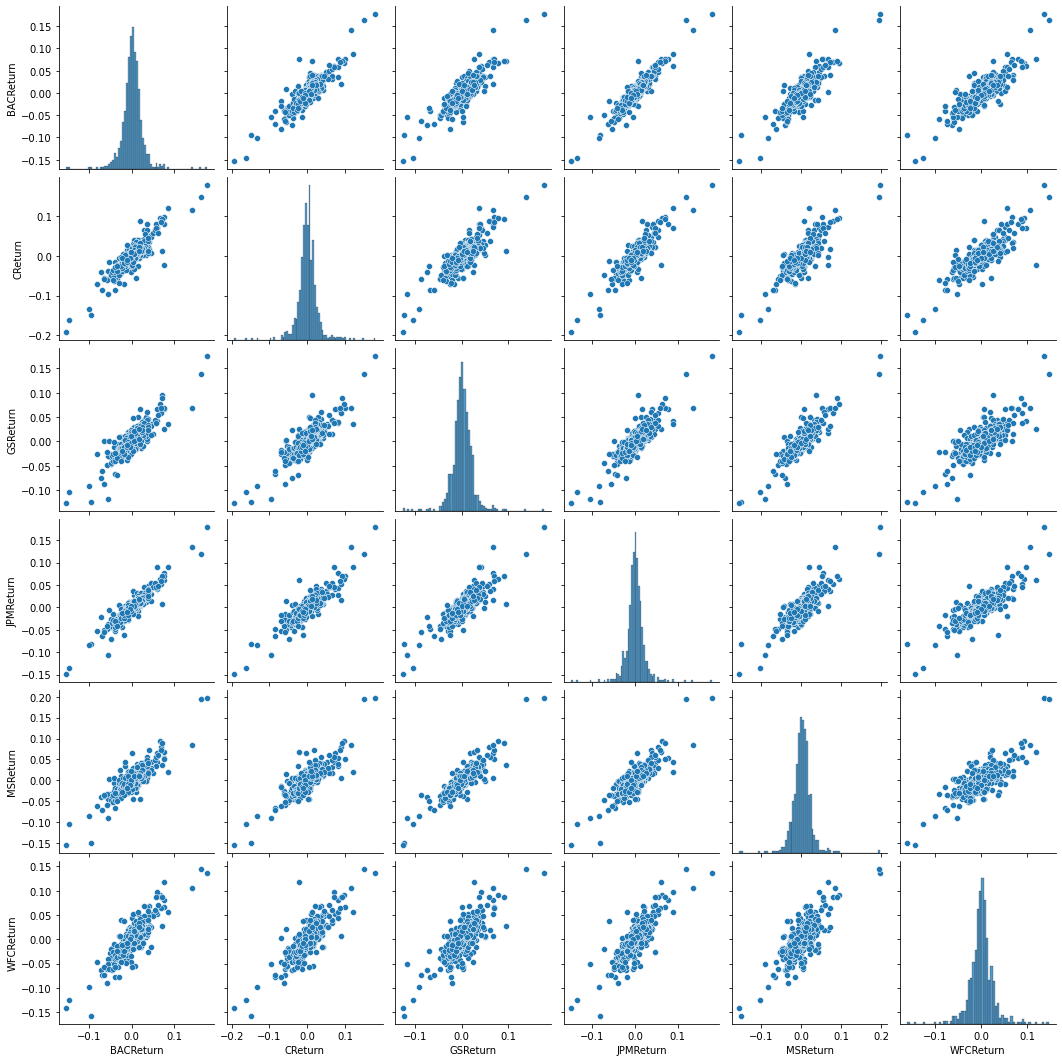

In [50]:
#Seaborn SNS for Returns
sns.pairplot(returns[1:])

In [51]:
returns.idxmin()

BACReturn   2020-03-16
CReturn     2020-03-16
GSReturn    2020-03-16
JPMReturn   2020-03-16
MSReturn    2020-03-16
WFCReturn   2020-03-12
dtype: datetime64[ns]

In [52]:
returns.idxmax()


BACReturn   2020-03-13
CReturn     2020-03-13
GSReturn    2020-03-13
JPMReturn   2020-03-13
MSReturn    2020-03-13
WFCReturn   2020-03-24
dtype: datetime64[ns]

In [53]:
returns.std()

BACReturn    0.024518
CReturn      0.027385
GSReturn     0.022691
JPMReturn    0.022236
MSReturn     0.024320
WFCReturn    0.026235
dtype: float64

In [54]:
returns.loc['2020-01-01':'2023-01-01'].std()

BACReturn    0.028003
CReturn      0.031499
GSReturn     0.025577
JPMReturn    0.025706
MSReturn     0.027719
WFCReturn    0.030652
dtype: float64

<AxesSubplot:xlabel='MSReturn', ylabel='Count'>

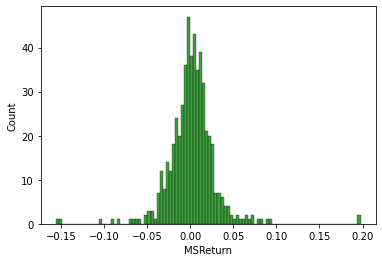

In [55]:
sns.histplot(returns.loc['2020-01-01':'2023-01-01']['MSReturn'], color='green',bins=100)


<AxesSubplot:xlabel='CReturn', ylabel='Count'>

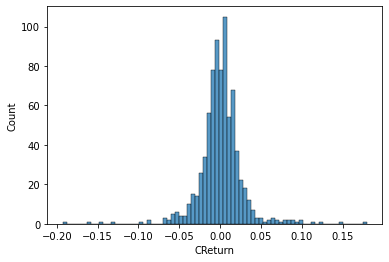

In [68]:
sns.histplot(returns.loc['2019-01-01':'2023-01-01']['CReturn'])

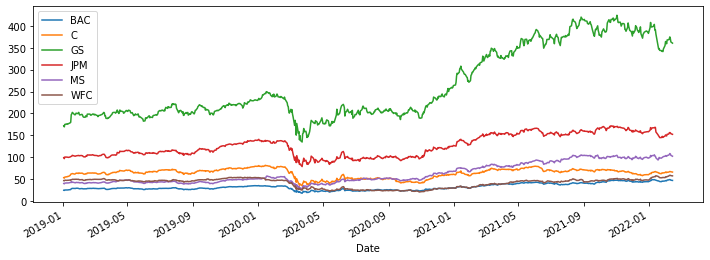

In [57]:
for tick in tickers:
    bank_stocks [tick]['Close'].plot(label=tick,figsize=(12,4))
plt.legend()

<AxesSubplot:xlabel='Date'>

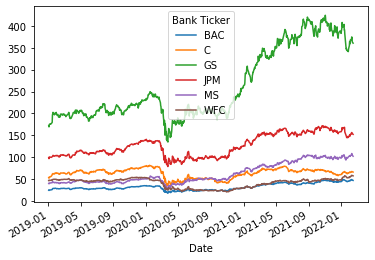

In [58]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

In [59]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

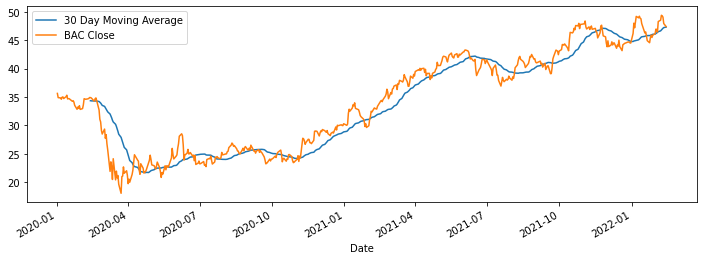

In [69]:
plt.figure(figsize=(12,4))
BAC['Close'].loc['2020-01-01':'2023-01-01'].rolling(window=30).mean().plot(label='30 Day Moving Average')
BAC['Close'].loc['2020-01-01':'2023-01-01'].plot(label='BAC Close')
plt.legend()

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

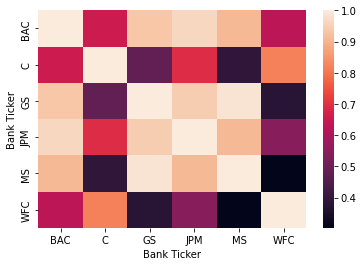

In [70]:
#sns.heatmap()
sns.heatmap(bank_stocks.xs(key='Close', axis=1, level = 'Stock Info').corr())

In [62]:
close_corr = bank_stocks.xs(key='Close', axis=1, level = 'Stock Info').corr()

In [63]:
close_corr.iplot(kind='heatmap', colorscale='rdylbu')

In [72]:
bac15 = BAC[['Open', 'High', 'Low', 'Close']].loc['2019-01-01':'2023-01-1']
bac15.iplot(kind='candle')

In [65]:
MS['Close'].loc['2015-01-01':'2023-01-1'].ta_plot(study='sma',periods=[21,34,55,144,233])


In [74]:
BAC[['Close']].loc['2020-01-01':'2023-01-1'].ta_plot(study='macd')